In [ ]:
!cd ../src && make

In [1]:
from commons import ejecutar, generar_instancias_performance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tiempo_amc = []
costo_amc = []
tiempo_vmc = []
costo_vmc = []
tiempo_agm = []
costo_agm = []
tiempo_ts = []
costo_ts = []
tiempo_tsa = []
costo_tsa = []

## Costo vs Tiempo

In [ ]:
# Generamos las instancias de experimentacion, serán i grafos de m vértices cada uno.
# Se generan en python/inputs_procesados/random_{m}_vertices_{i}.txt

m = 50
i = 50
generar_instancias_performance(m, i)

In [ ]:
# Ejecutamos sobre instancias Random de 50 vertices

instancias = 30

for i in range(instancias):
    res = ejecutar(F"random_50_vertices_{i}", 'AMC') # [tiempo, peso]
    tiempo_amc.append(res[0])
    costo_amc.append(res[1])
    res = ejecutar(F"random_50_vertices_{i}", 'VMC') # [tiempo, peso]
    tiempo_vmc.append(res[0])
    costo_vmc.append(res[1])
    res = ejecutar(F"random_50_vertices_{i}", 'AGM') # [tiempo, peso]
    tiempo_agm.append(res[0])
    costo_agm.append(res[1])
    res = ejecutar(F"random_50_vertices_{i}", 'TS', 20, 1, 40) # [tiempo, peso]
    tiempo_ts.append(res[0])
    costo_ts.append(res[1])
    res = ejecutar(F"random_50_vertices_{i}", 'TSA', 20, 1, 40) # [tiempo, peso]
    tiempo_tsa.append(res[0])
    costo_tsa.append(res[1])

In [ ]:
def graficar_performance():

    fig1, ax = plt.subplots()
    fig2, bx = plt.subplots()
    
    ax.scatter(tiempo_amc, costo_amc, c="blue", label="AMC")
    ax.scatter(tiempo_vmc, costo_vmc, c="red", label="VMC")
    ax.scatter(tiempo_agm, costo_agm, c="cyan", label="AGM")
    ax.scatter(tiempo_ts, costo_ts, c="green", label="TS")
    ax.scatter(tiempo_tsa, costo_tsa, c="orange", label="TSA")
    
    bx.scatter(tiempo_amc, costo_amc, c="blue", label="AMC")
    bx.scatter(tiempo_vmc, costo_vmc, c="red", label="VMC")
    bx.scatter(tiempo_agm, costo_agm, c="cyan", label="AGM")
    
    ax.legend()
    ax.set(xlabel='tiempo (s)', ylabel='Costo',
           title='Performance heuristicas')
    ax.grid()
    
    bx.legend()
    bx.set(xlabel='tiempo (s)', ylabel='Costo',
           title='Performance heuristicas | Acercamiento')
    bx.grid()
    
    #fig1.set_size_inches(8, 5)
    
    fig1.savefig("graficos/performance_algoritmos")
    fig2.savefig("graficos/performance_heuristicas")

graficar_performance()

## Tiempo vs Tamaño

In [ ]:
# instancias generadas aleatoriamente
# Ejecutamos 5 veces cada instancia y guardamos el promedio de los tiempos

cant_por_instancia = 5

for i in range(10, 101, 10):
    tiempos = []
    for j in range(cant_por_instancia):
        res = ejecutar(F"randoms/random_{i}_vertices_0", 'AMC') # [tiempo, peso]
        tiempos.append(res[0])
    tiempo_amc.append(np.mean(tiempos))
    tiempos = []
    for j in range(cant_por_instancia): 
        res = ejecutar(F"randoms/random_{i}_vertices_0", 'VMC') # [tiempo, peso]
        tiempos.append(res[0])
    tiempo_vmc.append(np.mean(tiempos))
    tiempos = []
    for j in range(cant_por_instancia):
        res = ejecutar(F"randoms/random_{i}_vertices_0", 'AGM') # [tiempo, peso]
        tiempos.append(res[0])
    tiempo_agm.append(np.mean(tiempos))
    tiempos = []
    for j in range(cant_por_instancia):
        res = ejecutar(F"randoms/random_{i}_vertices_0", 'TS', 20, 1, 40) # [tiempo, peso]
        tiempos.append(res[0])
    tiempo_ts.append(np.mean(tiempos))
    tiempos = []
    for j in range(cant_por_instancia):
        res = ejecutar(F"randoms/random_{i}_vertices_0", 'TSA', 20, 1, 40) # [tiempo, peso]
        tiempos.append(res[0])
    tiempo_tsa.append(np.mean(tiempos))

In [ ]:
def graficar_tiempos():
    t = [i for i in range(10, 101, 10)]

    fig1, ax = plt.subplots()
    fig2, bx = plt.subplots()
    
    ax.plot(t, tiempo_amc, label="AMC")
    ax.plot(t, tiempo_vmc, label="VMC")
    ax.plot(t, tiempo_agm, label="AGM")
    ax.plot(t, tiempo_tsa, label="TSA")
    
    bx.plot(t, tiempo_ts, label="TS")
    bx.plot(t, tiempo_tsa, label="TSA")
    
    ax.legend()
    ax.set(xlabel='Tamaño', ylabel='Tiempo (s)',
           title='Tiempos de ejecución heuristicas')
    ax.grid()
    
    bx.legend()
    bx.set(xlabel='Tamaño', ylabel='Tiempo (s)',
           title='Tiempos de ejecución metaheuristicas')
    bx.grid()
    
    fig1.savefig("graficos/tiempos_algoritmos")
    fig2.savefig("graficos/tiempos_metaheuristicas")
    
    plt.show()

graficar_tiempos()

## Costo vs Tamaño

In [4]:
# Generamos las instancias de experimentacion, serán i grafos de tamaño variado.
# Se generan en python/inputs_procesados/random_{m}_vertices_{i}.txt

m = [i for i in range(10, 101, 10)] # Tamaño de las intancias
i = 50
for j in m:
    generar_instancias_performance(j, i)

In [5]:
# instancias generadas aleatoriamente
# Ejecutamos 30 veces cada instancia, guardando costos y tiempos

instancias = 30

for i in m:
    # Ejecutamos AMC
    for j in range(instancias):   
        res = ejecutar(F"randoms/random_{i}_vertices_{j}", 'AMC') # [tiempo, peso]
        tiempo_amc.append(res[0])
        costo_amc.append(res[1])
    # Ejecutamos TSA
    for j in range(instancias):   
        res = ejecutar(F"randoms/random_{i}_vertices_{j}", 'TSA', 20, 1, 40) # [tiempo, peso]  
        tiempo_tsa.append(res[0])
        costo_tsa.append(res[1])

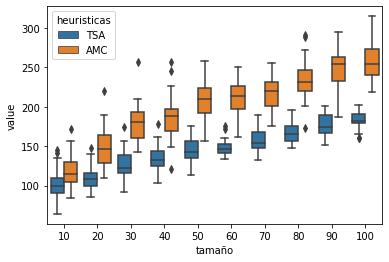

In [8]:
t = [i for i in range(10, 101, 10)]

grupos = []

for i in range(len(t)):
    for j in range(instancias):
        grupos.append(t[i])

df = pd.DataFrame({'tamaño': grupos,\
                  'TSA': costo_tsa,'AMC': costo_amc})
df = df[['tamaño','TSA','AMC']]

dd=pd.melt(df,id_vars=['tamaño'],value_vars=['TSA','AMC'],var_name='heuristicas')

sns_plot = sns.boxplot(x='tamaño',y='value',data=dd,hue='heuristicas')

fig = sns_plot.get_figure()
fig.savefig("graficos/boxplot.png")
